Steps for the project
- Import data, set datetime index
- Look for null values, missing values
- Plot the closing prices on one canvas using object oriented method and axes 
- Bollinger plot for individual stock on one canvas
- Plot the normalized returns to understand relative movement due to different price levels of individual stocks (also include the nifty 50 benchmark)
- Calculate log returns for the stocks (explain log returns little with example and advantages using reference)
- Look at correlations of returns, plot the returns using scatter plot to visualize relationship (Optional: Also perform linear regression)
- Perform regression analysis between the individual stocks and the nifty 50 benchmark to find beta, alpha, r value (correlation coefficient). Confirm the beta values by using formula for beta as well. 
- Calculate the expected return using the CAPM formula
- Calculate the sharpe ratio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
TATA = pd.read_csv('TATASTEEL.NS.csv')
JSW = pd.read_csv('JSWSTEEL.NS.csv')
NIFTY50 = pd.read_csv('^NSEI.csv')

In [3]:
TATA['Date'] = pd.to_datetime(TATA['Date'])
TATA.set_index('Date', inplace = True)
#change the format of the date in excel itself to YY/MM/DD 

In [4]:
JSW['Date'] = pd.to_datetime(JSW['Date'])
JSW.set_index('Date', inplace = True)

In [5]:
NIFTY50['Date'] = pd.to_datetime(NIFTY50['Date'])
NIFTY50.set_index('Date', inplace = True)

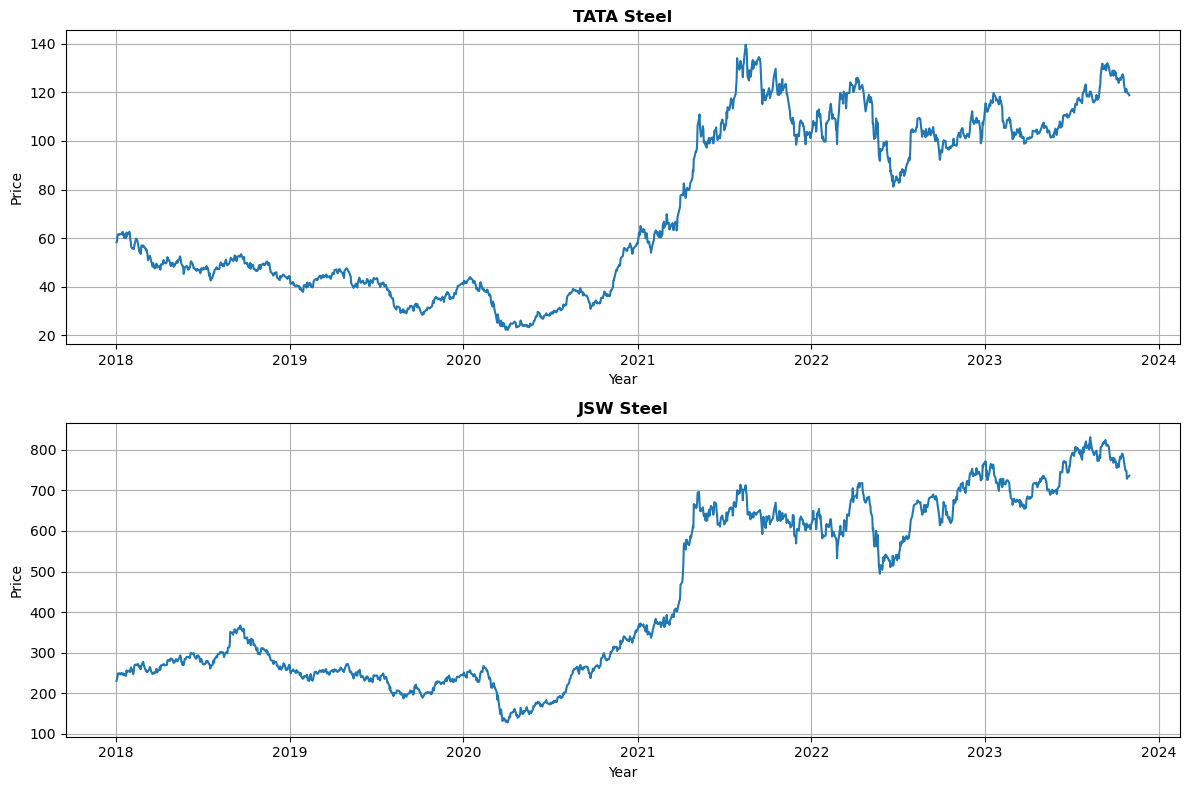

In [6]:
fig,axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
axes[0].plot(TATA['Adj Close'])
axes[0].set_ylabel('Price')
axes[0].set_xlabel('Year')
axes[0].set_title('TATA Steel', fontweight = 'bold')
axes[0].grid(True)
axes[1].plot(JSW['Adj Close'])
axes[1].set_ylabel('Price')
axes[1].set_xlabel('Year')
axes[1].set_title('JSW Steel', fontweight = 'bold')
axes[1].grid(True)
plt.tight_layout()

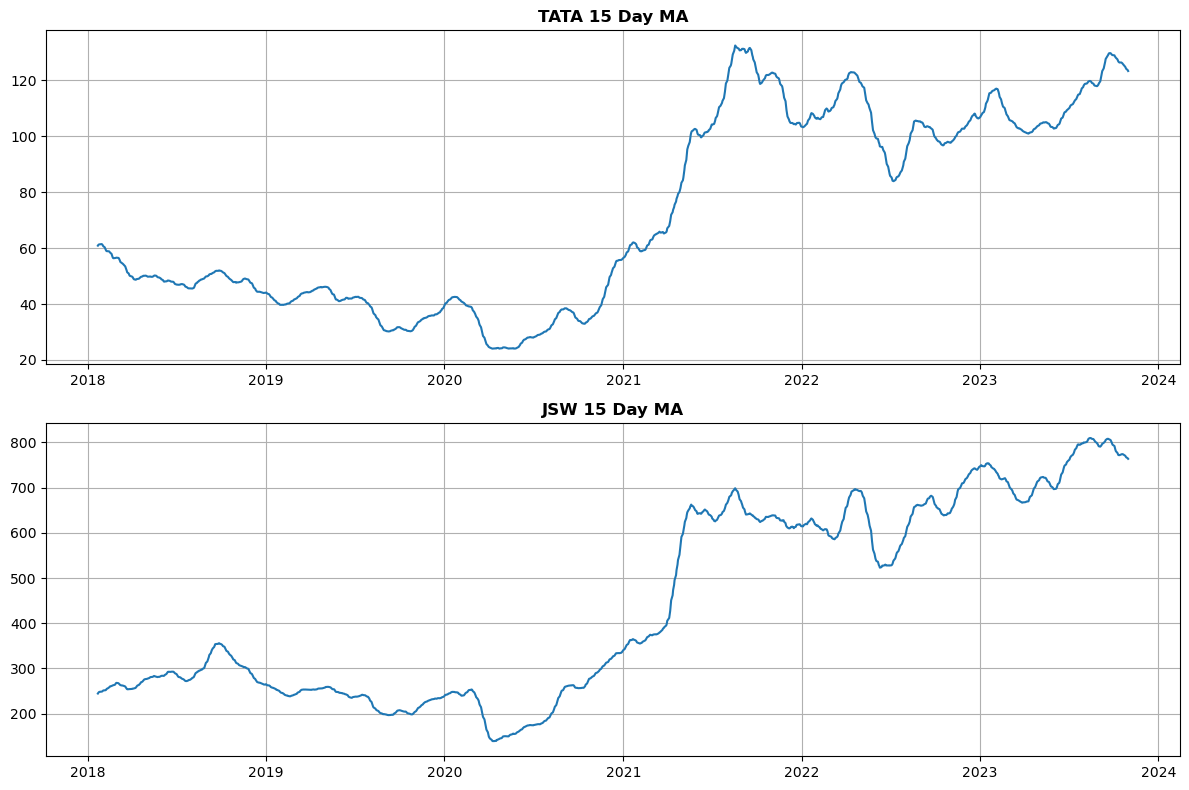

In [7]:
fig, axis = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
axis[0].plot(TATA['Adj Close'].rolling(window=15).mean())
axis[0].set_title('TATA 15 Day MA', fontweight = 'bold')
axis[0].grid(True)
axis[1].plot(JSW['Adj Close'].rolling(window=15).mean())
axis[1].set_title('JSW 15 Day MA', fontweight = 'bold')
axis[1].grid(True)
plt.tight_layout()

In [8]:
stock_name = ['TATA','JSW', 'NIFTY 50']


In [9]:
data = pd.concat([TATA,JSW,NIFTY50], axis=1, keys = stock_name)

In [10]:
data.tail(10)

TATA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-10-17  127.900002  128.550003  127.000000  127.400002  127.400002   
2023-10-18  127.849998  128.699997  126.599998  127.099998  127.099998   
2023-10-19  125.500000  126.500000  124.349998  126.000000  126.000000   
2023-10-20  125.000000  125.750000  122.699997  123.099998  123.099998   
2023-10-23  123.349998  123.400002  119.699997  120.000000  120.000000   
2023-10-25  121.199997  122.800003  120.750000  121.349998  121.349998   
2023-10-26  120.849998  120.900002  118.900002  119.900002  119.900002   
2023-10-27  120.500000  121.800003  119.500000  119.900002  119.900002   
2023-10-30  121.050003  121.250000  118.949997  119.150002  119.150002   
2023-10-31  120.000000  120.150002  118.400002  118.750000  118.750000   

                             JSW                                      \
              Volume        Open        High         Low       Close   
Date                                                                   
2023-10-17  24241710  792.700012  796.000000  788.150024  790.150024   
2023-10-18  20926079  793.099976  801.000000  781.200012  784.400024   
2023-10-19  30941319  780.150024  782.700012  769.150024  780.450012   
2023-10-20  30746140  779.599976  779.750000  761.900024  769.400024   
2023-10-23  30699479  770.799988  774.799988  746.099976  748.950012   
2023-10-25  27346103  754.099976  761.849976  741.500000  748.299988   
2023-10-26  36298907  744.700012  745.000000  725.500000  728.700012   
2023-10-27  28424007  729.700012  735.450012  725.250000  732.000000   
2023-10-30  18753217  734.799988  736.799988  726.000000  734.500000   
2023-10-31  22319950  737.000000  738.549988  727.000000  736.349976   

                                    NIFTY 50                            \
             Adj Close   Volume         Open         High          Low   
Date                                                                     
2023-10-17  790.150024  1050381  19843.19922  19849.75000  19775.65039   
2023-10-18  784.400024  1250892  19820.44922  19840.94922  19659.94922   
2023-10-19  780.450012  2130597  19545.19922  19681.80078  19512.34961   
2023-10-20  769.400024  1501944  19542.15039  19593.80078  19518.69922   
2023-10-23  748.950012  1715908  19521.59961  19556.84961  19257.84961   
2023-10-25  748.299988  2417579  19286.44922  19347.30078  19074.15039   
2023-10-26  728.700012  2519570  19027.25000  19041.69922  18837.84961   
2023-10-27  732.000000  1588987  18928.75000  19076.15039  18926.65039   
2023-10-30  734.500000  1162173  19053.40039  19158.50000  18940.00000   
2023-10-31  736.349976  1363728  19232.94922  19233.69922  19056.44922   

                                                
                  Close    Adj Close    Volume  
Date                                            
2023-10-17  19811.50000  19811.50000  185800.0  
2023-10-18  19671.09961  19671.09961  198900.0  
2023-10-19  19624.69922  19624.69922  230300.0  
2023-10-20  19542.65039  19542.65039  198300.0  
2023-10-23  19281.75000  19281.75000  176000.0  
2023-10-25  19122.15039  19122.15039  225300.0  
2023-10-26  18857.25000  18857.25000  300400.0  
2023-10-27  19047.25000  19047.25000  205200.0  
2023-10-30  19140.90039  19140.90039  180100.0  
2023-10-31  19079.59961  19079.59961  206000.0

In [11]:
Normed = pd.DataFrame()
for name in stock_name:
    Normed[name + ' Normed'] = data[name]['Adj Close']/data[name]['Adj Close'].iloc[0]

In [12]:
Normed.head(5)

,TATA Normed,JSW Normed,NIFTY 50 Normed
Date,,,
2018-01-02,1.000000,1.000000,1.000000
2018-01-03,1.007747,1.015687,1.000096
2018-01-04,1.042438,1.047628,1.005995
2018-01-05,1.056767,1.077679,1.011171
2018-01-08,1.054093,1.081081,1.017372


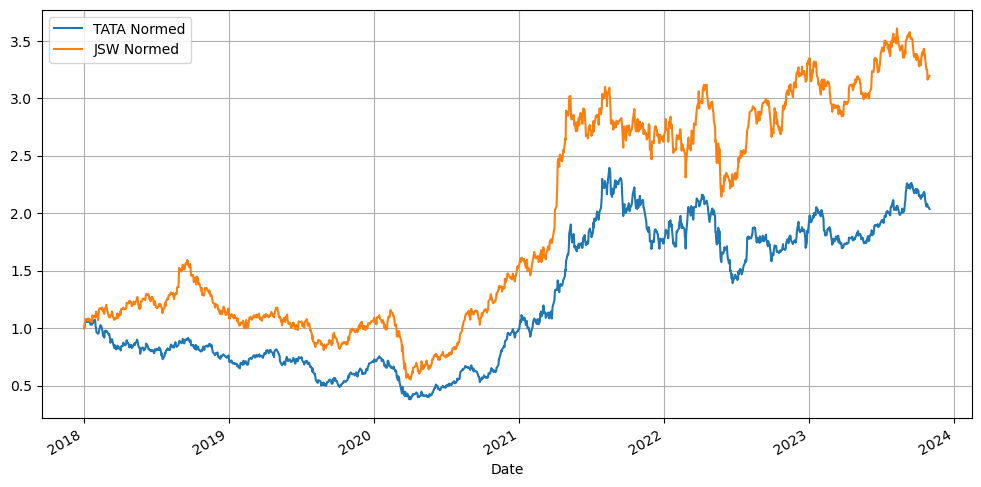

In [13]:
plt.figure(figsize = (12,6))
Normed['TATA Normed'].plot()
Normed['JSW Normed'].plot()
plt.grid(True)
plt.legend()

In [14]:
returns = pd.DataFrame()
returns['TATA Returns'] = TATA['Adj Close'].pct_change()
returns['JSW Returns'] = JSW['Adj Close'].pct_change()
returns['NIFTY 50 Returns'] = NIFTY50['Adj Close'].pct_change()
# Can be done without using for loop if number of stocks is less like in our case 

In [15]:
returns

,TATA Returns,JSW Returns,NIFTY 50 Returns
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.007747,0.015687,0.000096
2018-01-04,0.034424,0.031448,0.005899
2018-01-05,0.013746,0.028685,0.005145
2018-01-08,-0.002530,0.003157,0.006132
...,...,...,...
2023-10-25,0.011250,-0.000868,-0.008277
2023-10-26,-0.011949,-0.026193,-0.013853
2023-10-27,0.000000,0.004529,0.010076


In [16]:
import numpy as np
log_ret = np.log(1+returns)

In [17]:
log_ret

,TATA Returns,JSW Returns,NIFTY 50 Returns
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.007717,0.015565,0.000096
2018-01-04,0.033845,0.030963,0.005881
2018-01-05,0.013652,0.028281,0.005132
2018-01-08,-0.002534,0.003152,0.006114
...,...,...,...
2023-10-25,0.011187,-0.000868,-0.008312
2023-10-26,-0.012021,-0.026542,-0.013950
2023-10-27,0.000000,0.004518,0.010025


In [18]:
log_ret.corr()

,TATA Returns,JSW Returns,NIFTY 50 Returns
TATA Returns,1.000000,0.752316,0.593265
JSW Returns,0.752316,1.000000,0.644235
NIFTY 50 Returns,0.593265,0.644235,1.000000


<AxesSubplot:>

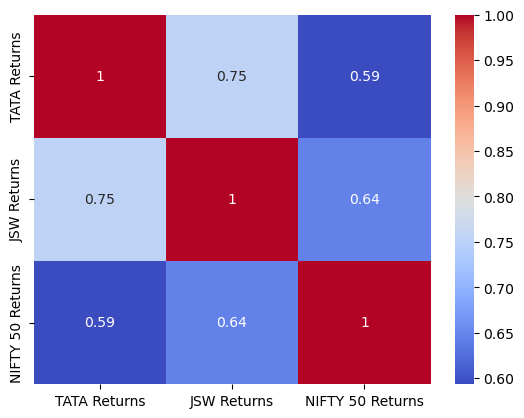

In [19]:
sns.heatmap(log_ret.corr(), annot = True, cmap = 'coolwarm')

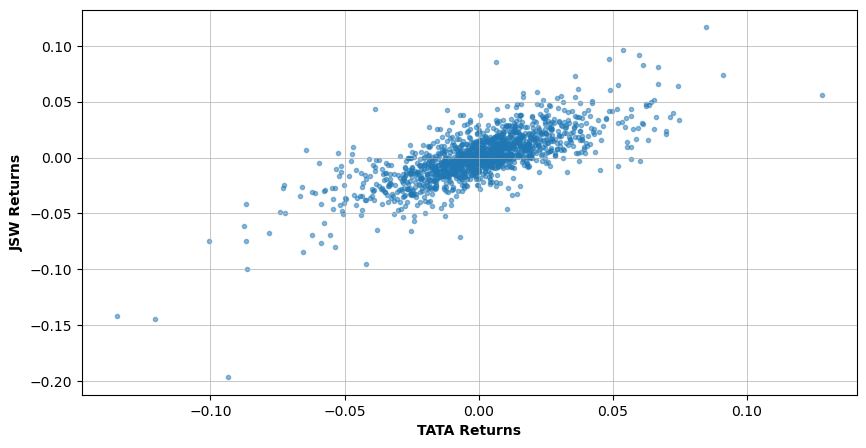

In [20]:
plt.figure(figsize = (10,5))
plt.scatter(log_ret['TATA Returns'],log_ret['JSW Returns'], marker = '.', alpha = 0.5)
plt.xlabel('TATA Returns', fontweight = 'bold')
plt.ylabel('JSW Returns', fontweight = 'bold')
plt.grid(ls='-',lw='0.5');

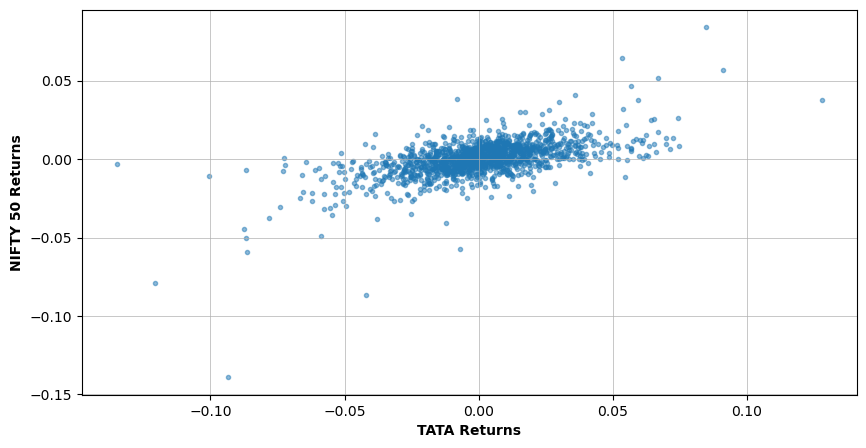

In [21]:
plt.figure(figsize = (10,5))
plt.scatter(log_ret['TATA Returns'],log_ret['NIFTY 50 Returns'], marker = '.', alpha = 0.5)
plt.xlabel('TATA Returns', fontweight = 'bold')
plt.ylabel('NIFTY 50 Returns', fontweight = 'bold')
plt.grid(ls='-',lw='0.5');

In [22]:
from scipy import stats

In [23]:
# Performing regression analysis between TATA and NIFTY 50 returns
stats.linregress(log_ret['NIFTY 50 Returns'].iloc[1:],log_ret['TATA Returns'].iloc[1:])

LinregressResult(slope=1.2348388665348913, intercept=-2.25966888534123e-05, rvalue=0.5932649179606216, pvalue=1.5263892378762062e-137, stderr=0.044201097421312646, intercept_stderr=0.0005157293232654604)

Be careful when putting in the x and y values in the linregress function. We want to calculate the relationship of TATA steel's returns with returns of NIFTY 50. So, x, which is the independent variable, will be NIFTY 50 returns and y, which is the dependent variable, will be TATA Steel's returns

In [24]:
# Performing regression analysis between JSW and NIFTY 50 returns
stats.linregress(log_ret['NIFTY 50 Returns'].iloc[1:],log_ret['JSW Returns'].iloc[1:])

LinregressResult(slope=1.288612657931472, intercept=0.0002676353190796155, rvalue=0.6442349738102936, pvalue=1.56499558272115e-169, stderr=0.040356479923822165, intercept_stderr=0.00047087111621019244)

In [25]:
# Average annual return over the period
(log_ret.mean()*250)*100

TATA Returns        12.366231
JSW Returns         20.185146
NIFTY 50 Returns    10.471931
dtype: float64

In [26]:
# Average annual volatility or risk over the period
log_ret.std()*(250**0.5)

TATA Returns        0.383876
JSW Returns         0.368899
NIFTY 50 Returns    0.184429
dtype: float64

In [27]:
annual_ret = log_ret.loc['2020-10-31':'2023-10-31'].mean()*250
annual_ret

TATA Returns        0.393308
JSW Returns         0.321132
NIFTY 50 Returns    0.166207
dtype: float64

In [28]:
annual_vol = log_ret.loc['2020-10-31':'2023-10-31'].std()*(250**0.5)
annual_vol

TATA Returns        0.361947
JSW Returns         0.326227
NIFTY 50 Returns    0.148066
dtype: float64

In [29]:
# Calculating sharpe ratio for NIFTY 50 over the three year period
sharpe_NIFTY = (annual_ret['NIFTY 50 Returns']-0.075)/annual_vol['NIFTY 50 Returns']
sharpe_NIFTY
# Assuming a risk free rate of 7.5 % which is the yield of 10 year Indian Government bonds

0.6159855217784476

In [30]:
# Calculating sharpe ratio for TATA Steel
sharpe_TATA = (annual_ret['TATA Returns']-0.075)/annual_vol['TATA Returns']
sharpe_TATA

0.8794322271197866

In [31]:
# Calculating sharpe ratio for JSW Steel
sharpe_JSW = (annual_ret['JSW Returns']-0.075)/annual_vol['JSW Returns']
sharpe_JSW

0.7544793388272402

In [32]:
#TATA.index

In [33]:
log_ret.loc['2020-10-31':'2023-10-31']['TATA Returns'].mean()*250

0.39330773124322216

In [34]:
log_ret.loc['2020-10-31':'2023-10-31']['TATA Returns'].std()*(250**0.5)

0.3619468577876732

In [35]:
(0.39-0.075)/0.36

0.875

In [36]:
log_ret.loc['2020-10-31':'2023-10-31']['JSW Returns'].mean()*250

0.32113155256348686

In [37]:
log_ret.loc['2020-10-31':'2023-10-31']['JSW Returns'].std()*(250**0.5)

0.32622702822594557

In [38]:
(0.32-0.075)/0.32

0.765625

Sharpe ratio significance: https://www.etmoney.com/learn/mutual-funds/sharpe-ratio-formula-calculation-and-importance-limitations/#:~:text=R(p)%20is%20the%20historic,Bank%20of%20India's%20FD%20return.

In [39]:
#       

In [40]:
x = log_ret.loc['2020-10-31':'2023-10-31'].mean()*250
x

TATA Returns        0.393308
JSW Returns         0.321132
NIFTY 50 Returns    0.166207
dtype: float64

In [41]:
x['TATA Returns']

0.39330773124322216